In [1]:
# MANIPULAÇÃO DOS DADOS
import pandas as pd

# MANIPULAÇÃO DE ARRAY
import numpy as np

# BIBLIOTECA DE GRÁFICOS
import matplotlib.pyplot as plt

# BIBLIOTECAS DE MACHINE LEARNING
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [197]:
names= ['Classificacao','Alcool','AcidoMalico','Cinza','AlcalinidadeCinzas','Magnesio','FenoisTotais','Flavonoides','FenoisNaoFlavonoides','Proantocianinas','IntensidadeCor','Cor','VinhosDiluidos','Prolina']
dfWines = pd.read_csv("wine.data", names=names)

# DIMINIU A CLASSIFICAÇÃO PARA FICAR IGUAL O NUMERO DE CLUSTERS
dfWines['Classificacao']  = dfWines['Classificacao'] - 1

# SHUFFLE NO DF
dfWinesShuffle = dfWines.sample(frac=1, random_state=7).reset_index(drop=True)

In [198]:
dfWinesShuffle.head()

,Classificacao,Alcool,AcidoMalico,Cinza,AlcalinidadeCinzas,Magnesio,FenoisTotais,Flavonoides,FenoisNaoFlavonoides,Proantocianinas,IntensidadeCor,Cor,VinhosDiluidos,Prolina
0,2,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.650000,0.54,1.86,625
1,0,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.600000,1.09,2.78,880
2,2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.260000,0.72,1.75,685
3,2,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
4,1,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.940000,0.69,2.84,352


In [199]:
X_train, X_test, y_train, y_test = train_test_split(dfWinesShuffle.iloc[:,1:14], dfWinesShuffle.iloc[:,0], test_size=0.30, random_state=13)

KMeans_model = KMeans(n_clusters=3, random_state=3)
Y_Predict = KMeans_model.fit_predict(X_train)

In [200]:
KMeans_Prediction = KMeans_model.fit_predict(X_test)
acuracia = round(accuracy_score(KMeans_Prediction, y_test) * 100,2)

In [201]:
acuracia

83.33

In [202]:
print(classification_report(y_test, KMeans_Prediction))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.89      0.76      0.82        21
           2       0.61      0.85      0.71        13

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.86      0.83      0.84        54



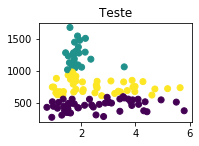

In [214]:
plt.subplot(224)
plt.scatter([X_train.iloc[:,1]], [X_train.iloc[:,12]], c=[Y_Predict])
plt.title("Teste")
plt.show()

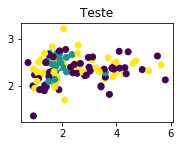

In [191]:
KMeans_Acuracia = 0
KMeans_Seed_00 = 0
KMeans_Seed_01 = 0
KMeans_Seed_02 = 0
names= ['Classificacao','Alcool','AcidoMalico','Cinza','AlcalinidadeCinzas','Magnesio','FenoisTotais','Flavonoides','FenoisNaoFlavonoides','Proantocianinas','IntensidadeCor','Cor','VinhosDiluidos','Prolina']

for a in range(0,20,1):
    for i in range(0,20,1):
        for z in range(0,20,1):

            # PEGA A BASE
            dfWines = pd.read_csv("wine.data", names=names)

            # DIMINIU A CLASSIFICAÇÃO PARA FICAR IGUAL O NUMERO DE CLUSTERS
            dfWines['Classificacao']  = dfWines['Classificacao'] - 1

            # SHUFFLE NO DF
            dfWinesShuffle = dfWines.sample(frac=1, random_state=a).reset_index(drop=True)

            X_train, X_test, y_train, y_test = train_test_split(dfWinesShuffle.iloc[:,1:14], dfWinesShuffle.iloc[:,0], test_size=0.30, random_state=i)

            KMeans_model = KMeans(n_clusters=3, random_state=z)
            Y_Predict = KMeans_model.fit_predict(X_train)

            KMeans_Prediction = KMeans_model.fit_predict(X_test)
            acuracia = round(accuracy_score(KMeans_Prediction, y_test) * 100,2)
            if acuracia > KMeans_Acuracia:
                KMeans_Acuracia = acuracia
                KMeans_Seed_00 = a
                KMeans_Seed_01 = i
                KMeans_Seed_02 = z

# PEGA A BASE
dfWines = pd.read_csv("wine.data", names=names)

# DIMINIU A CLASSIFICAÇÃO PARA FICAR IGUAL O NUMERO DE CLUSTERS
dfWines['Classificacao']  = dfWines['Classificacao'] - 1

# SHUFFLE NO DF
dfWinesShuffle = dfWines.sample(frac=1, random_state=KMeans_Seed_00).reset_index(drop=True)
    
X_train, X_test, y_train, y_test = train_test_split(dfWinesShuffle.iloc[:,1:14], dfWinesShuffle.iloc[:,0], test_size=0.30, random_state=KMeans_Seed_01)

KMeans_model = KMeans(n_clusters=3, random_state=KMeans_Seed_02)
Y_Predict = KMeans_model.fit_predict(X_train)

KMeans_Prediction = KMeans_model.fit_predict(X_test)
acuracia = round(accuracy_score(KMeans_Prediction, y_test) * 100,2)

plt.subplot(224)
plt.scatter([X_train.iloc[:,1]], [X_train.iloc[:,2]], c=[Y_Predict])
plt.title("Teste")
plt.show()

In [192]:
KMeans_Seed_00

7

In [193]:
KMeans_Seed_01

13

In [194]:
KMeans_Seed_02

3

In [195]:
KMeans_Acuracia

83.33

In [196]:
print(classification_report(y_test, KMeans_Prediction))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.89      0.76      0.82        21
           2       0.61      0.85      0.71        13

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.86      0.83      0.84        54

